In [2]:
import pandas as pd
pd.options.display.max_rows = 100
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import scipy.stats as stats
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [3]:
def statistics(df):
    """ The function for counting the share of employees with promotions in the last 5 years, average satisfaction 
    level and average number of projects; works with DataFrame()"""
    promotion_share = round(df['promotion_last_5years'].value_counts()[1] /
                            df['promotion_last_5years'].value_counts()[0] * 100, 2)
    avg_satisfaction_level = df['satisfaction_level'].mean().round(4)
    avg_number_project = df['number_project'].mean().round(4)
    print(f'Доля сотрудников с повышением за последние 5 лет - {promotion_share} %;')
    print(f'Средняя степень удовлетворенности - {avg_satisfaction_level};')
    print(f'Среднее количество проектов - {avg_number_project}.')

## Импорт данных

In [4]:
df = pd.read_csv(r'HR.csv', sep=',')
df.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Основные статистики для переменных

In [5]:
metrics = df.describe().round(3)
mode = df.mode().drop(1).drop(['department', 'salary'], axis=1)
mode.rename(index={0: 'mode'}, inplace=True)
metrics = pd.concat([metrics, mode])
metrics.rename(index={'50%': '50% / median'}, inplace=True)
metrics

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000,14999.000,14999.000,14999.000,14999.000,14999.000,14999.000,14999.000
mean,0.613,0.716,3.803,201.050,3.498,0.145,0.238,0.021
std,0.249,0.171,1.233,49.943,1.460,0.352,0.426,0.144
min,0.090,0.360,2.000,96.000,2.000,0.000,0.000,0.000
25%,0.440,0.560,3.000,156.000,3.000,0.000,0.000,0.000
50% / median,0.640,0.720,4.000,200.000,3.000,0.000,0.000,0.000
75%,0.820,0.870,5.000,245.000,4.000,0.000,0.000,0.000
max,1.000,1.000,7.000,310.000,10.000,1.000,1.000,1.000
mode,0.100,0.550,4.000,135.000,3.000,0.000,0.000,0.000


###### Моды для average_montly_hours две (135 и 156)

## Корреляционная матрица

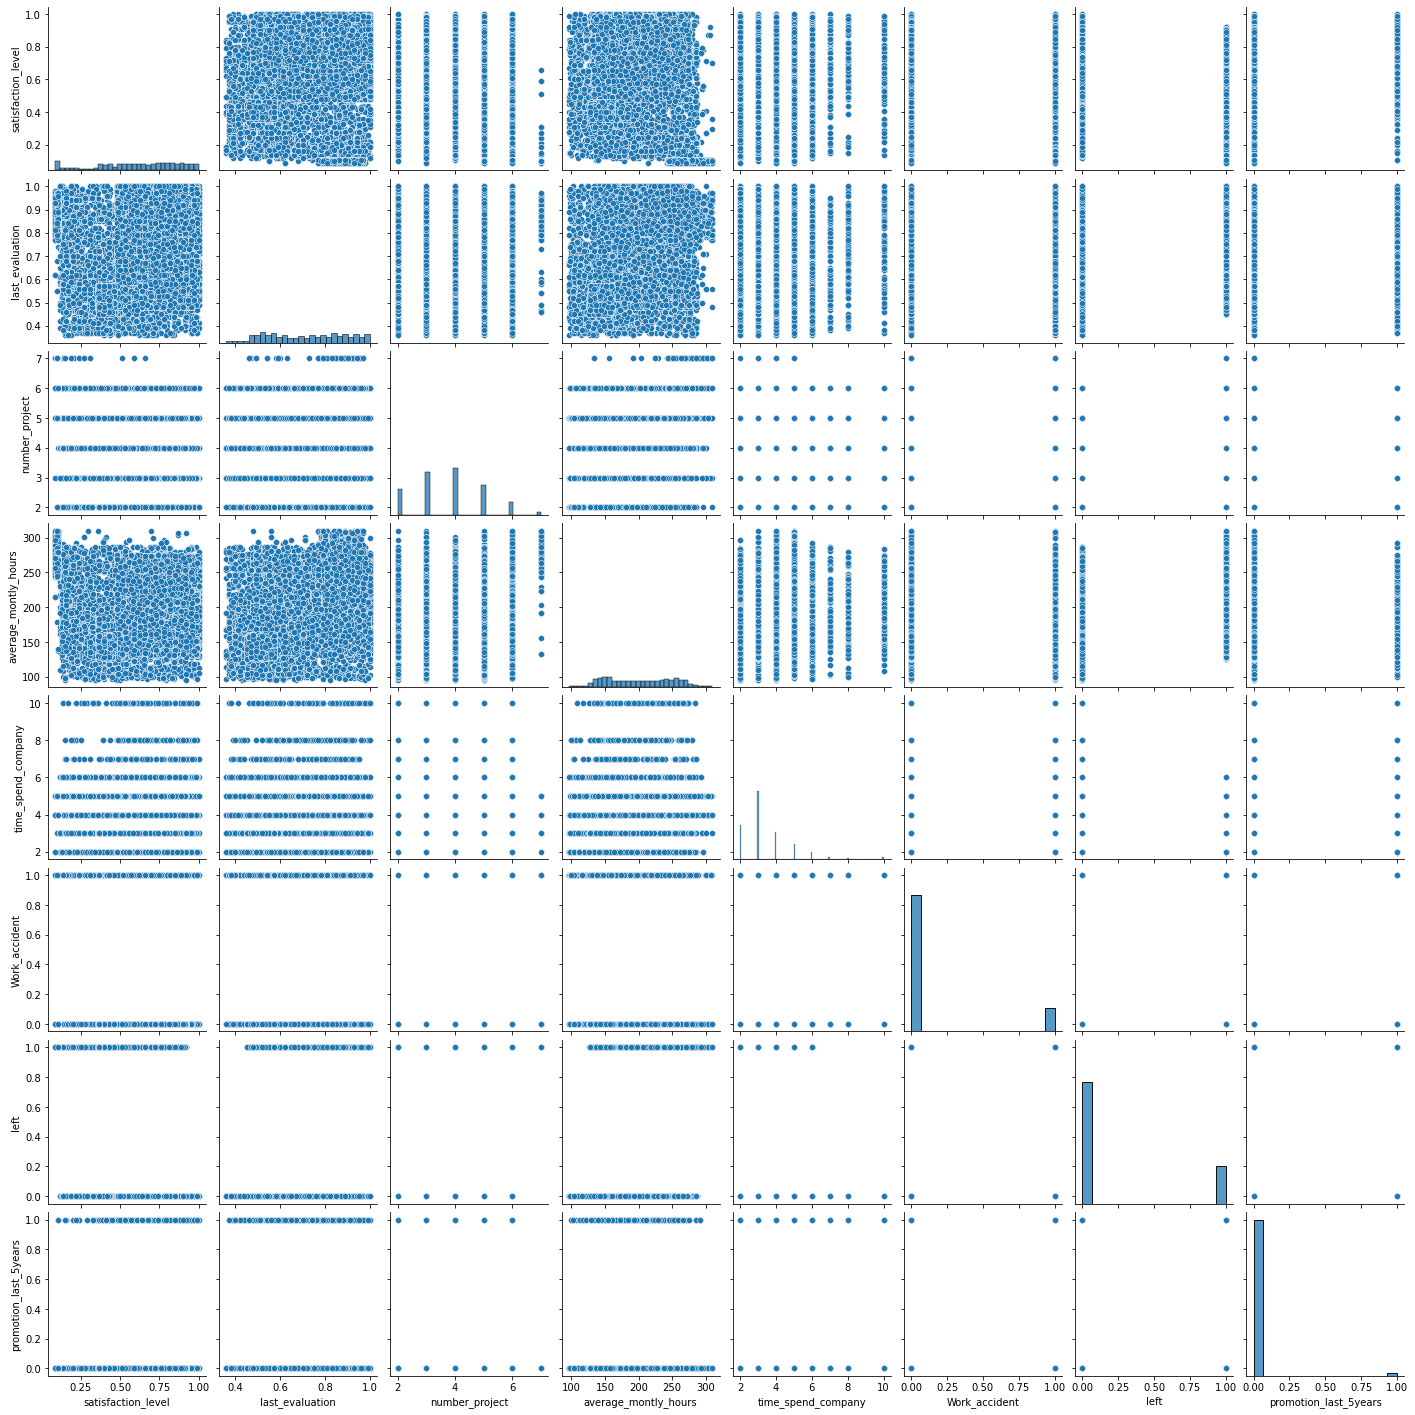

In [6]:
sns.pairplot(df)

In [7]:
df.corr().round(4)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.0000,0.1050,-0.1430,-0.0200,-0.1009,0.0587,-0.3884,0.0256
last_evaluation,0.1050,1.0000,0.3493,0.3397,0.1316,-0.0071,0.0066,-0.0087
number_project,-0.1430,0.3493,1.0000,0.4172,0.1968,-0.0047,0.0238,-0.0061
average_montly_hours,-0.0200,0.3397,0.4172,1.0000,0.1278,-0.0101,0.0713,-0.0035
time_spend_company,-0.1009,0.1316,0.1968,0.1278,1.0000,0.0021,0.1448,0.0674
Work_accident,0.0587,-0.0071,-0.0047,-0.0101,0.0021,1.0000,-0.1546,0.0392
left,-0.3884,0.0066,0.0238,0.0713,0.1448,-0.1546,1.0000,-0.0618
promotion_last_5years,0.0256,-0.0087,-0.0061,-0.0035,0.0674,0.0392,-0.0618,1.0000


In [8]:
df.corr(method='spearman').round(4)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.0000,0.1624,0.0058,0.0620,-0.1394,0.0563,-0.3658,0.0223
last_evaluation,0.1624,1.0000,0.3504,0.3421,0.1612,-0.0058,-0.0024,-0.0072
number_project,0.0058,0.3504,1.0000,0.3979,0.2520,0.0023,-0.0195,-0.0030
average_montly_hours,0.0620,0.3421,0.3979,1.0000,0.1688,-0.0061,0.0465,-0.0030
time_spend_company,-0.1394,0.1612,0.2520,0.1688,1.0000,-0.0273,0.2689,0.0352
Work_accident,0.0563,-0.0058,0.0023,-0.0061,-0.0273,1.0000,-0.1546,0.0392
left,-0.3658,-0.0024,-0.0195,0.0465,0.2689,-0.1546,1.0000,-0.0618
promotion_last_5years,0.0223,-0.0072,-0.0030,-0.0030,0.0352,0.0392,-0.0618,1.0000


Text(0.5, 1.0, 'Визуализация корреляционной матрицы (метод Спирмена)')

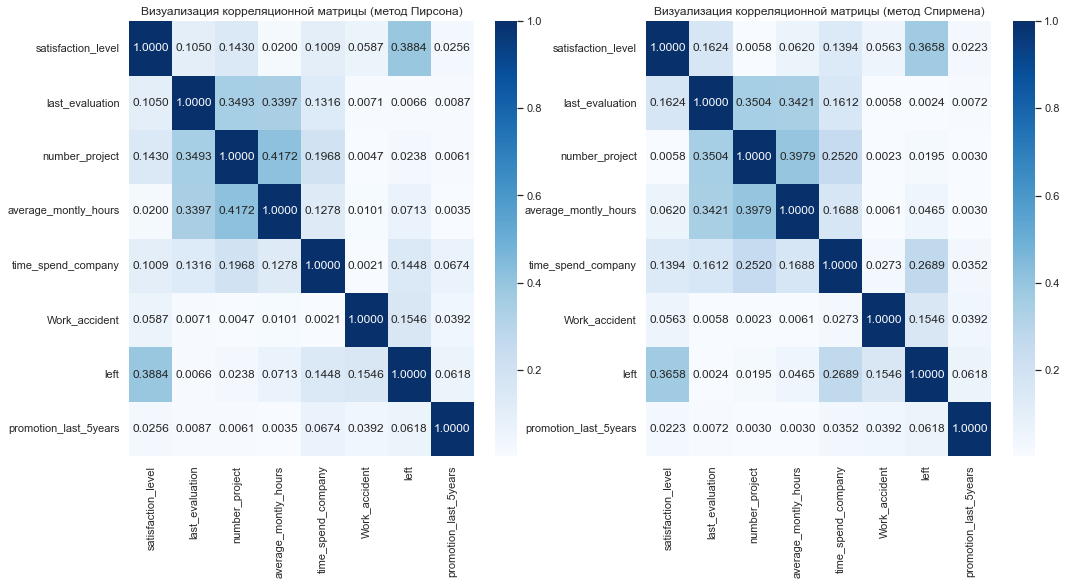

In [9]:
sns.set(rc={'figure.figsize': (17, 8)})
plt.subplot(1, 2, 1)
sns.heatmap(df.corr().abs(), annot=True, cmap="Blues", fmt='.4f').set_title(
    'Визуализация корреляционной матрицы (метод Пирсона)')
plt.subplot(1, 2, 2)
sns.heatmap(df.corr(method='spearman').abs(), annot=True, cmap="Blues", fmt='.4f').set_title(
    'Визуализация корреляционной матрицы (метод Спирмена)')

In [10]:
print((f'Корреляционный минимум (по методу Пирсона) - {df.corr().abs().min().min()}\n\
Корреляционный минимум (по методу Спирмена) - {df.corr(method="spearman").abs().min().min()}'))

Корреляционный минимум (по методу Пирсона) - 0.0021204180967097077
Корреляционный минимум (по методу Спирмена) - 0.0023276242127821386


#### Наиболее скоррелированные переменные - average_montly_hours и number_project;

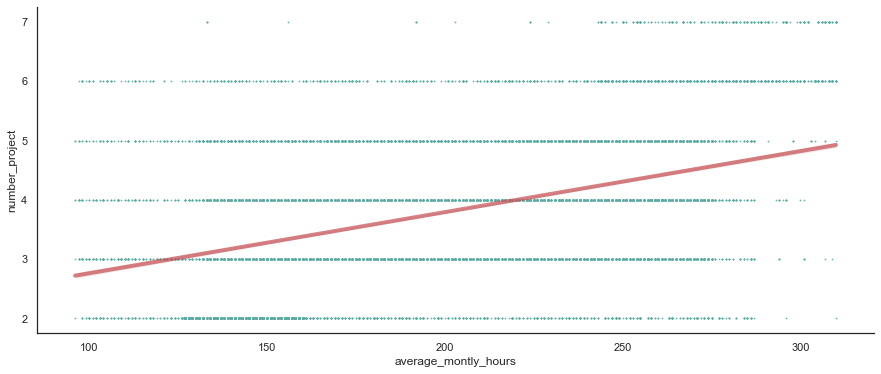

In [11]:
sns.set(rc={'figure.figsize': (15, 6)}, style='white')
sns.regplot(x=df['average_montly_hours'],
            y=df['number_project'],
            color='#57ada3',
            line_kws={'color': 'r', 'alpha': 0.7, 'lw': 4},
            scatter_kws={'s': 0.7})
sns.despine()

#### Наименее скоррелированные переменные - Work_accident и time_spend_company и Work_accident и number_project 

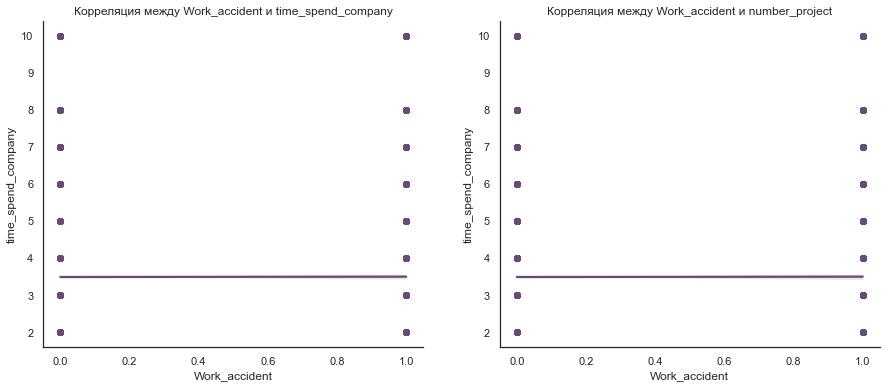

In [12]:
plt.subplot(1, 2, 1)
plt.title('Корреляция между Work_accident и time_spend_company')
sns.regplot(x=df['Work_accident'], y=df['time_spend_company'], color='#664c77')
plt.subplot(1, 2, 2)
plt.title('Корреляция между Work_accident и number_project')
sns.regplot(x=df['Work_accident'], y=df['time_spend_company'], color='#664c77')
sns.despine()

### Распределение сотрудников по департаментам

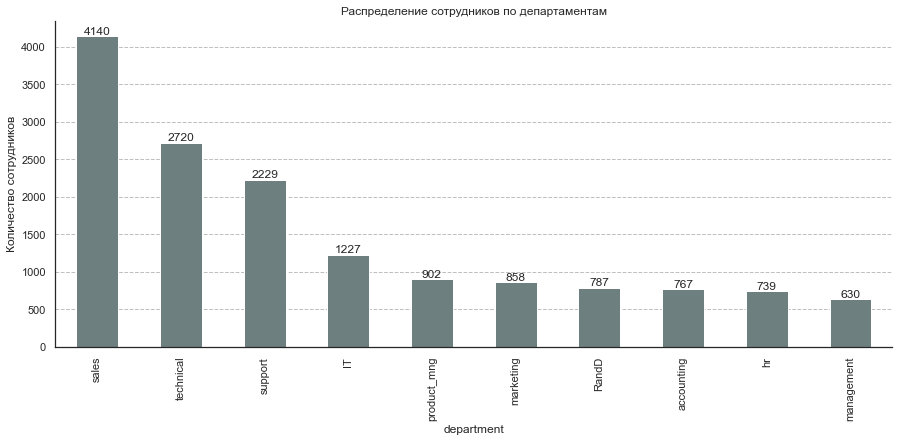

In [13]:
sns.set_style('white')
department_df = (df.groupby('department').agg(employees_count=('left', 'count')).
                 sort_values(by='employees_count', ascending=False))
department_df.plot(kind='bar', 
                   ylabel='Количество сотрудников', 
                   title='Распределение сотрудников по департаментам', 
                   color='#6e7f80',
                   legend=False)
for i, value in enumerate(department_df.values):
    plt.text(i, value, int(value), horizontalalignment='center', verticalalignment='bottom', fontdict={'size':12})
plt.grid(axis='y', color='grey', alpha=0.5, linestyle='--')
sns.despine()

### Визуализация распределения содруников по зарплатам

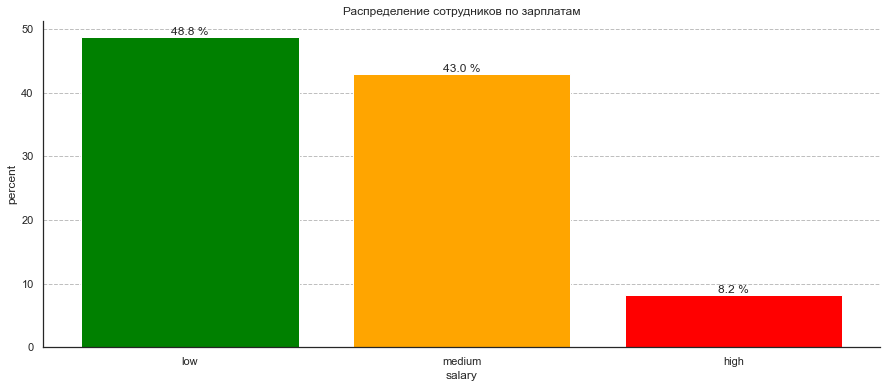

In [14]:
heights = [
    df['salary'].value_counts()['low'] / df['salary'].count() * 100,
    df['salary'].value_counts()['medium'] / df['salary'].count() * 100,
    df['salary'].value_counts()['high'] / df['salary'].count() * 100
]
plt.bar(['low', 'medium', 'high'], height=heights, color=['green', 'orange', 'red'])
plt.xlabel('salary')
plt.ylabel('percent')
plt.title(f'Распределение сотрудников по зарплатам')
for i, value in enumerate(heights):
    plt.text(i, value, f'{round(value, 1)} %', 
             horizontalalignment='center', verticalalignment='bottom', fontdict={'size': 12})
plt.grid(axis='y', color='grey', alpha=0.5, linestyle='--')
sns.despine()

### Визуализация распределения содруников по зарплатам (по департаментам)

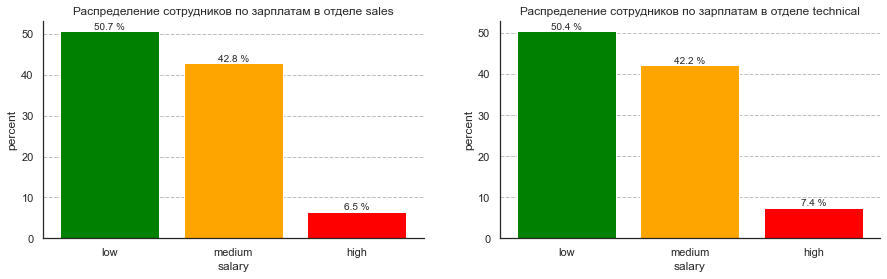

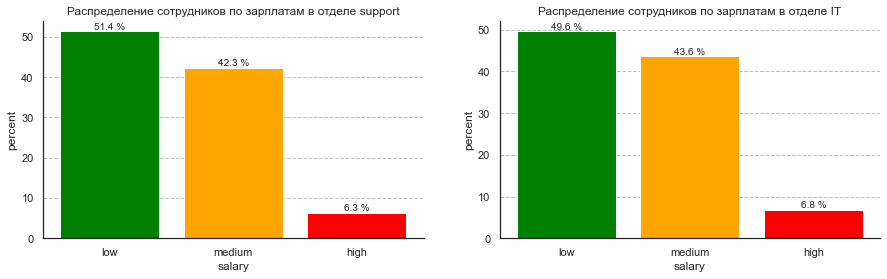

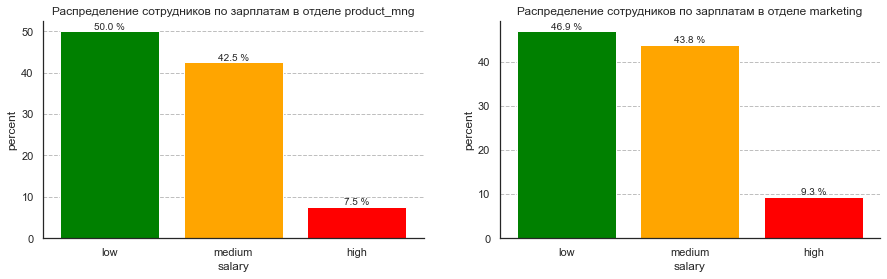

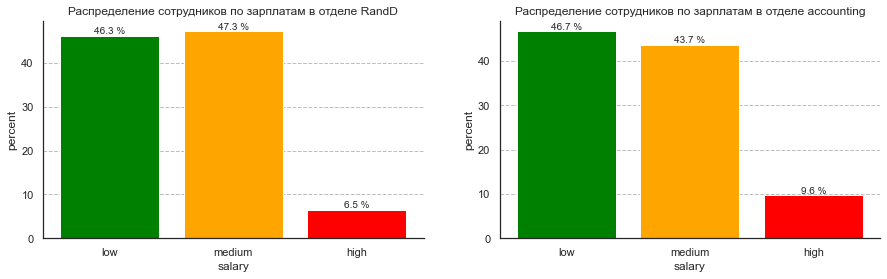

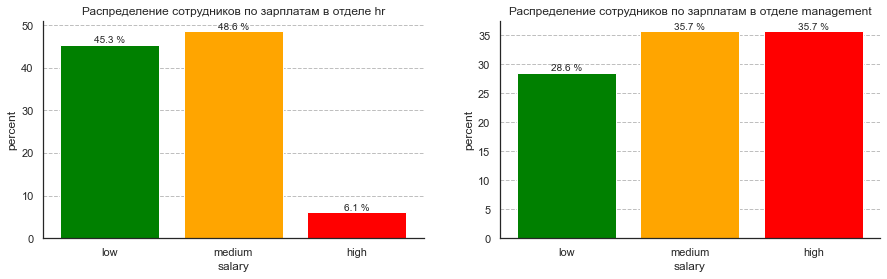

In [15]:
sns.set(rc={'figure.figsize': (15, 4)}, style='white')
colors_list = ['#5cb85c', '#5bc0de', '#d9534f']
for c, i in enumerate(department_df.index):
    if c % 2 == 0:
        plt.subplot(1, 2, 1)
    else:
        plt.subplot(1, 2, 2)
    heights = [
        df[df['department'] == i]['salary'].value_counts()['low'] / df[df['department'] == i]['salary'].count() * 100,
        df[df['department'] == i]['salary'].value_counts()['medium'] / df[df['department'] == i][
            'salary'].count() * 100,
        df[df['department'] == i]['salary'].value_counts()['high'] / df[df['department'] == i]['salary'].count() * 100
    ]
    plt.bar(['low', 'medium', 'high'], height=heights, color=['green', 'orange', 'red'])
    plt.xlabel('salary')
    plt.ylabel('percent')
    plt.title(f'Распределение сотрудников по зарплатам в отделе {i}')
    plt.grid(axis='y', color='grey', alpha=0.5, linestyle='--')
    sns.despine()
    for i, value in enumerate(heights):
        plt.text(i, value, f'{round(value, 1)} %',
                 horizontalalignment='center', verticalalignment='bottom', fontdict={'size': 10})
    if c % 2 != 0:
        plt.show()

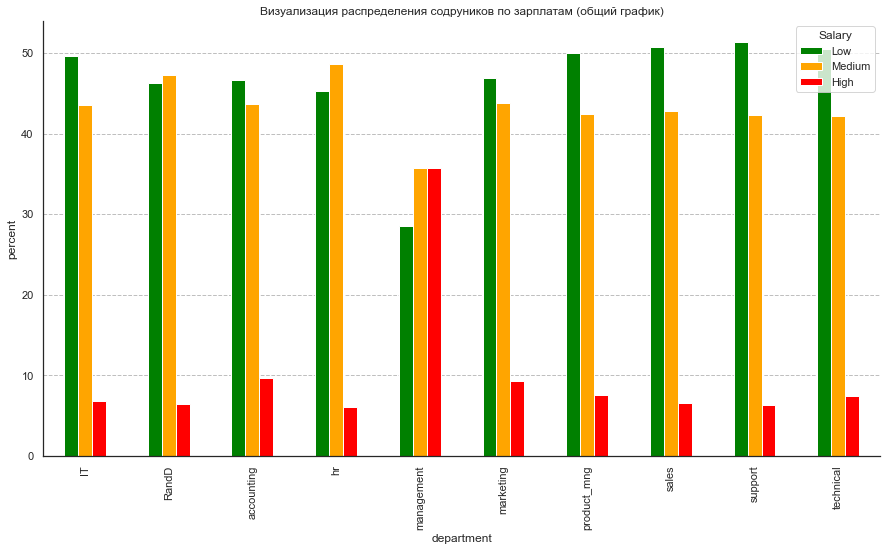

In [16]:
salaries = df.groupby(['department', 'salary']).agg(employees_count=('left', 'count')) \
    .sort_values(by='employees_count', ascending=False).unstack().droplevel(0, axis=1)
salaries['high_perc'] = salaries.high / (salaries.high + salaries.medium + salaries.low) * 100
salaries['med_perc'] = salaries.medium / (salaries.high + salaries.medium + salaries.low) * 100
salaries['low_perc'] = salaries.low / (salaries.high + salaries.medium + salaries.low) * 100
salaries[['low_perc', 'med_perc', 'high_perc']].plot(kind='bar', figsize=(15, 8), color=['green', 'orange', 'red'])
plt.ylabel('percent')
plt.legend(['Low', 'Medium', 'High'], title='Salary', loc=0)
plt.title('Визуализация распределения содруников по зарплатам (общий график)')
plt.grid(axis='y', color='grey', alpha=0.5, linestyle='--')
sns.despine()

### Проверка гипотезы, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом

In [17]:
df[df.salary.isin(['low', 'high'])].groupby('salary').agg(average_montly_hours_mean=('average_montly_hours', 'mean'))

,average_montly_hours_mean
salary,
high,199.867421
low,200.996583


In [18]:
low = df[df.salary == 'low']['average_montly_hours']
high = df[df.salary == 'high']['average_montly_hours']
print(low.shape, high.shape)

(7316,) (1237,)


In [19]:
stats.ttest_ind(low, high, equal_var=False)

Ttest_indResult(statistic=0.7624331665385475, pvalue=0.4459045542257889)

#### Вывод : так как значение pvalue значительно больше уровня значимости (0,001), нулевая гипотеза не отвергается, т.е. сотрудники с высоким окладом проводят на работе столько же времени, сколько и сотрудники с низким окладом

### Расчёт показателей среди уволившихся сотрудников

In [20]:
statistics(df[df.left == 1])

Доля сотрудников с повышением за последние 5 лет - 0.53 %;
Средняя степень удовлетворенности - 0.4401;
Среднее количество проектов - 3.8555.


### Расчёт показателей среди оставшихся сотрудников

In [21]:
statistics(df[df.left == 0])

Доля сотрудников с повышением за последние 5 лет - 2.7 %;
Средняя степень удовлетворенности - 0.6668;
Среднее количество проектов - 3.7867.


### Linear Discriminant Analysis

In [22]:
X = df[df.columns[:-2]].drop('left', axis=1)
y = df.left.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [23]:
np.unique(y, return_counts=True)

(array([0, 1], dtype=int64), array([11428,  3571], dtype=int64))

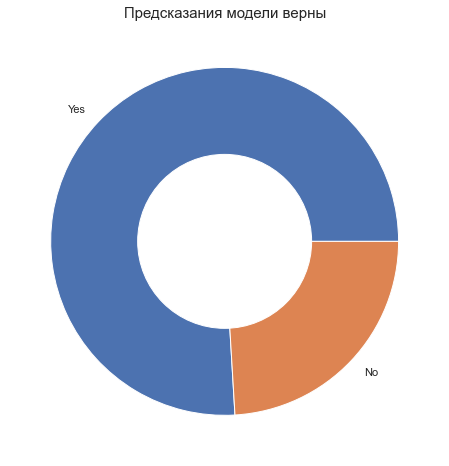

In [24]:
result_df = pd.DataFrame([y_test, lda.predict(X_test)], index=['y_test', 'lda_predict']).T
result_df['match'] = (result_df.lda_predict - result_df.y_test).apply(lambda x: 'Yes' if x == 0 else 'No')
result_df.match.value_counts().plot(kind='pie', ylabel='', figsize=(8, 8))
plt.title('Предсказания модели верны', fontdict={'size': 15})
my_circle = plt.Circle((0, 0), 0.5, color='white')
p = plt.gcf()
p.gca().add_artist(my_circle)

Text(0.5, 12.5, 'Predicted label\n\nAccuracy=0.759\nPrecision=0.495\nRecall=0.273\nF1 Score=0.352')

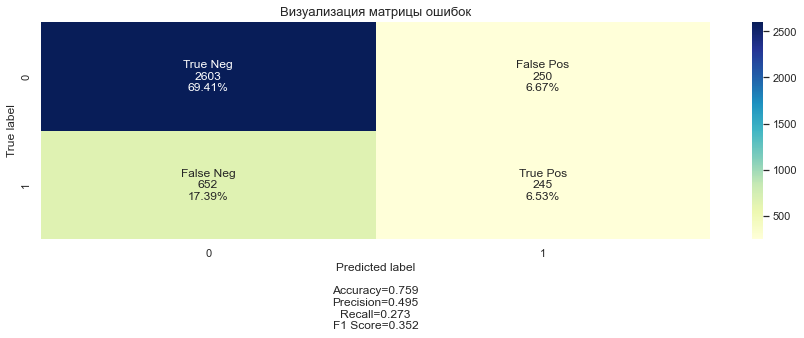

In [25]:
cf_matrix = confusion_matrix(y_test, lda.predict(X_test))

accuracy = np.trace(cf_matrix) / float(np.sum(cf_matrix))
precision = cf_matrix[1, 1] / sum(cf_matrix[:, 1])
recall = cf_matrix[1, 1] / sum(cf_matrix[1, :])
f1_score = 2 * precision * recall / (precision + recall)

group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2, 2)
plt.title('Визуализация матрицы ошибок', fontdict={'size': 13})
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='YlGnBu')
plt.ylabel('True label')
plt.xlabel('Predicted label' + '\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}' \
           .format(accuracy, precision, recall, f1_score))

In [26]:
print(f'В {group_percentages[0]} случаев модель верно определила, что работники останутся.')
print(f'В {group_percentages[1]} случаев модель неверно определила, что работники уволятся,\
работники остались (ложноположительный результат).')
print(f'В {group_percentages[2]} случаев модель неверно определила, что работники останутся,\
работники уволились (ложноотрицательный результат).')
print(f'В {group_percentages[3]} случаев модель верно определила, что работники уволятся.')

В 69.41% случаев модель верно определила, что работники останутся.
В 6.67% случаев модель неверно определила, что работники уволятся,работники остались (ложноположительный результат).
В 17.39% случаев модель неверно определила, что работники останутся,работники уволились (ложноотрицательный результат).
В 6.53% случаев модель верно определила, что работники уволятся.
